<a href="https://colab.research.google.com/github/wodnjse/machine-learning/blob/main/Regression-Algorithm/machine_learning_3_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
# csv 파일을 데이터 프레임으로 저장
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/머신러닝/농어/perch_data.csv')
perch_full = df.to_numpy()
print(perch_full)
perch_full.shape

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

(56, 3)

In [42]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [43]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full,
                                                                      perch_weight, random_state = 42)

# 사이킷런의 변환기
- 사이킷런은 특성을 만들거나 전처리하기 위한 다양한 클래스 제공
- 이런 클래스를 *변환기*(transform)라고 함
- 모델 클래스에 fit, score, predict 있는 것처럼
- 변환기 클래스는 모두 *fit(), transform()* 메서드 제공
- 사용할 변환기는 *PolynomialFeatures* 클래스


    ->특성 공학을 직접 하지 않고 자동화

# PolynomialFratures 이해

- sklearn.preprocessing 패키지의 PolynomialFeatures 임포트

- 클래스 객체 생성 후 *fit(), transform() 메서드 차례대로 호출*

- 훈련을 해야 변환 가능

- fit: 새롭게 만들 특성 조합 탐색

- transform: 실제로 변환

- 변환기는 입력 데이터를 변환하는데 타깃 데이터가 필요하지 않음

In [44]:
#  클래스 객체 생성 후 fit(), transform() 매서드 차례대로 호출
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

# 처음에는 2개의 특성(원소) 가짐: 2, 3
# 각 특성의 제곱 추가: 2²= 4 / 3²= 9
# 특성끼리 서로 곱하여 추가: 2*3 = 6
# 절편은 항상 1과 곱하기에 추가: 1

[[1. 2. 3. 4. 6. 9.]]


In [45]:
# 절편은 항상 1과 곱해지는 계수
# 데이터 변환(특성공학) 전 실제 특성: 길이, 높이, 두께, 1
# 사이킷런의 선형 모델은 자동으로 절편 추가하므로 특성에 1추가 필요 X
# include_bias = False로 지정: 특성의 제곱과 특성끼리 곱한 항만 추가

poly = PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [46]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)

# 실데이터 크기 및 특성 추가 후 크기 확인
print(train_input.shape)
print(train_poly.shape)

(42, 3)
(42, 9)


In [47]:
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

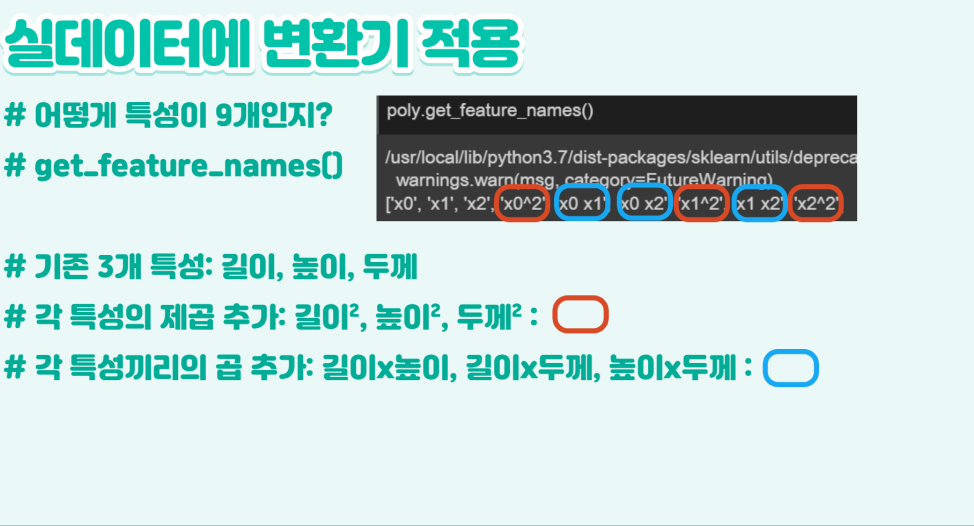

In [48]:
# 여러 개의 특성을 사용하여 선영 회귀 수행

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


### 매우 높은 점수 

### 길이, 높이, 두께, 다항 특성 추가 -> <br> 특성이 늘어나면 선형 회귀 능력 강해짐

In [49]:
# 테스트 세트 점수 확인
print(lr.score(test_poly, test_target))

0.9714559911594134


### 테스트 세트 점수는 기존과 유사함

### 과소적합 문제는 해결

In [50]:
# 3제곱, 4제곱, 5제곱 항을 넣어서 특성을 더 많이 추가
# degree 매개변수 = 필요한 고차항의 최대 차수 지정 가능

poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

# 특성의 개수가 무려 55개 -> 다시 훈련

(42, 55)


In [51]:
# 과대적합

# 훈련 세트는 거의 완벽한 점수

lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999991097


In [52]:
# 테스트 세트는 아주 큰 음수
# 특성의 개수를 크게 늘리면 아주 강력해짐 -> 과대적합
# 테스트 세트에서는 형편없는 점수

print(lr.score(test_poly, test_target))

-144.40579242684848


#### 특성을 다시 줄여야 하나?
# 특성 수는 유지하되 과대적함을 줄이자!

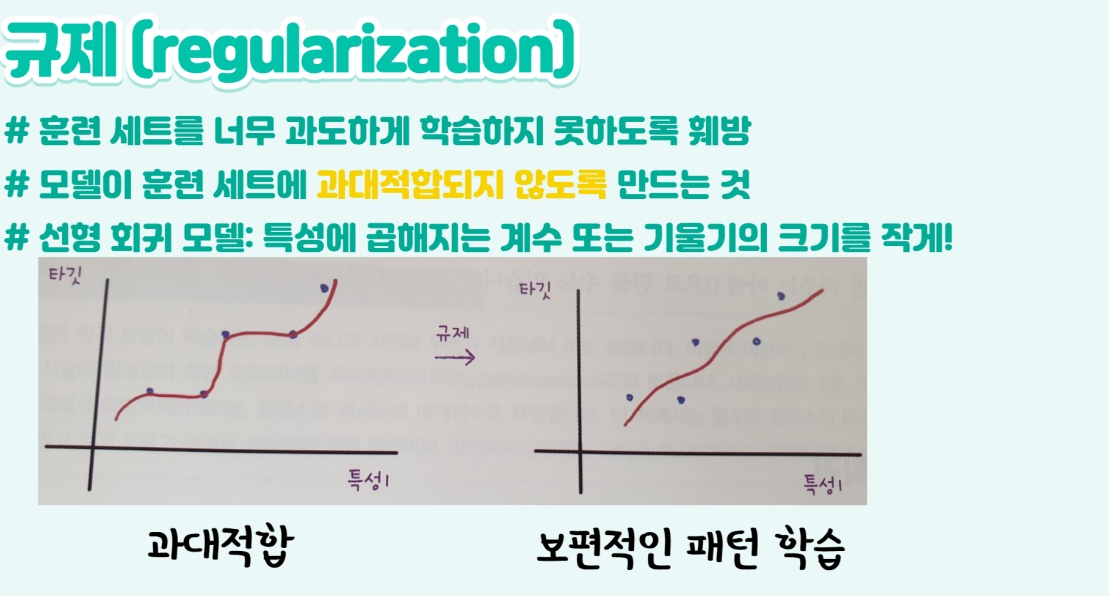

# 데이터 정규화

- 선형 회귀 모델에 규제 적용할 때 계수 값의 크기가 서루 많이 다르면 공정하게 제어되지 않음

- 규제를 적용하기 전에 *정규화* 필요

- 3장: 평균과 표준편차를 직접 구해 특성을 표준점수로 변환

- 사이킷런에서 제공하는 *StandardScaler* 클래스 사용: 변환기의 하나

In [53]:
# 훈련 세트로 학습한 변환기를 동일하게 사용해 테스트 세트까지 변환

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

# 릿지와 리쏘


- 55개의 특성으로 훈련한 선형 회귀 모델의 계수 규제

- 훈련 세트의 점수를 낮추지만 테스트 세트의 점수를 높게함

- 선형 회귀 모델에 규제를 추가한 모델 2가지

- 두 모델은 규제를 가하는 방법이 다름

- *릿지(ridge)*: 계수를 제곱한 값을 기준으로 규제를 적용

- *라쏘(lasso)*: 계수의 절댓값을 기준으로 규제를 적용

- 일반적으로 *릿지를 더 선호*

- 두 알고리즘 모두 계수의 크기를 줄이지만, 라쏘는 *0도 가능*


In [54]:
# 릿지
# sklearn.linear_model 패키지
# 훈련, 사용하는 방법이 항상 같음

from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


## 선형 회귀에서 거의 완벽한 점수가 조금 낮아졌지만, 테스트 세트는 더 좋아짐

In [61]:
print(ridge.score(test_scaled, test_target))

# 많은 특성을 사용했음에도 훈련 세트에 너무 과대적합되지 않음

0.9627042641050291


# 규제 강도 조절
- 규제의 양을 임의로 조절 가능

- alpha 매개변수로 규제의 강도 조절

- alpha 값이 크면 규제 강도가 세짐<br/>
 -> 계수 값을 더 줄이고 과소적합되도록 유도

- alpha 값이 크면 과대적합될 가능성 큼

- alpha 값: *하이퍼파라미터(hyperparameter)*<br/>
 -머신러닝 모델이 학습하는 값이 아니라 사람이 알려ㅜ저야 하는 파라미터

- 적절한 alpha 값을 찾는 방법<br/>
 -alpha 값에 대한 *R²값*의 그래프 그리기

- 훈련 세트와 테스트 세트의 점수가 *가장 가까운* 지점 <br/>- *최적*의 alpha 값

In [62]:
# alpha 값 바꿀 때마다 score()결과를 저장할 리스트 생성

import matplotlib.pyplot as plt

train_score = []
test_score = []

In [63]:
# alpha 값 0.1~100까지 10배씩 늘려가며 릿지 회귀 모델 훈련

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for a in alpha_list:
  # 릿지 모델 생성
  ridge  = Ridge(alpha = a)
  # 릿지 모델 훈련
  ridge.fit(train_scaled, train_target)
  #훈련 점수와 테스트 점수를 저장
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))

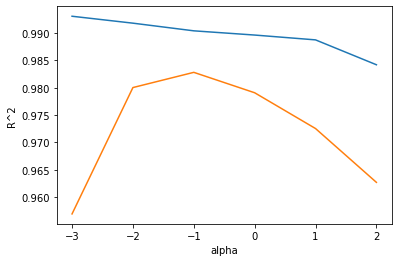

In [65]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

# alpha값을 0.001부터 10배씩 늘렸기 때문에 그래프 왼쪽이 너무 촘촘해짐
# alpha_list에 있는 6개 값을 동일한 간격으로 나타내야 함
# 로그 함수로 바꾸어 지수로 표현(-0.001은 -3, 0.003은 -2, 100은 2)

In [69]:
# 두 그래프가 가장 가깝고 테스트 세트의 점수가 가장 높은 alpha값을 최종 훈련: -1, 즉 10⁻¹= 0.1

ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)

print('train data score: ' ,ridge.score(train_scaled, train_target))
print('test data score: ' ,ridge.score(test_scaled, test_target))

# 훈련 세트와 테스트 세트의 점수가 비슷하게 모두 높음
# 과대적합, 과소적합 아님

train data score:  0.9903815817570366
test data score:  0.9827976465386926


In [72]:
# 라쏘 모델 훈련은 릿지와 매우 비슷 (클래스만 변경)

from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print('train data score: ', lasso.score(train_scaled, train_target))
print('test data score: ', lasso.score(test_scaled, test_target))

train data score:  0.989789897208096
test data score:  0.9800593698421883


In [73]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  # 라쏘 모델 생성
  lasso = Lasso(alpha=alpha, max_iter=10000)
  # 라쏘 모델 훈련
  lasso.fit(train_scaled, train_target)
  # 훈련 점수와 테스트 점수를 저장합니다
  train_score.append(lasso.score(train_scaled, train_target))
  train_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
